In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
X.shape:(26, 2)


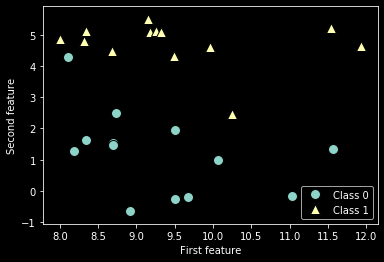

In [2]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:{}".format(X.shape))

Text(0, 0.5, 'Target')

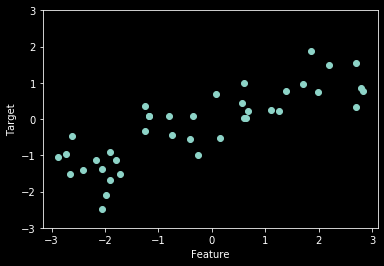

In [3]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,"o")
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
X,y = mglearn.datasets.load_extended_boston()

/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


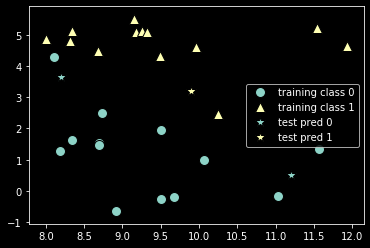

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


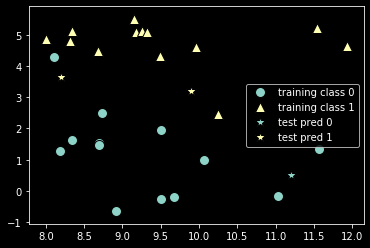

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [10]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [12]:
clf.score(X_test,y_test)

0.8571428571428571

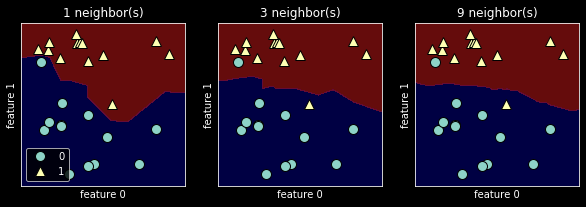

In [13]:
fig,axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

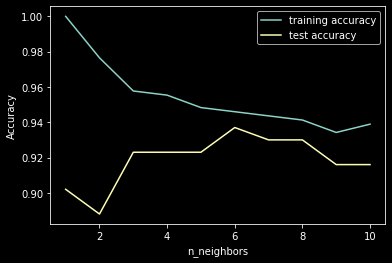

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train ,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state = 66)

training_accuracy =[]
test_accuracy =[]
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

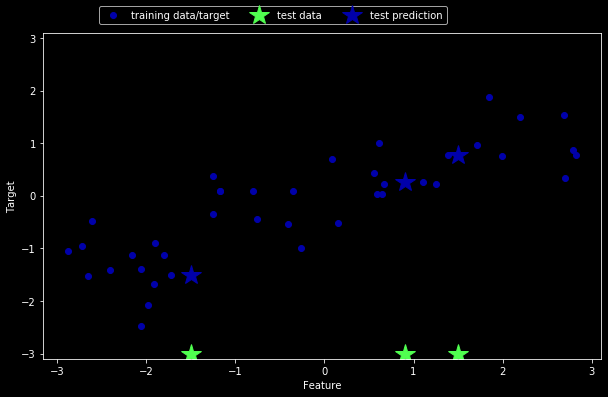

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train ,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

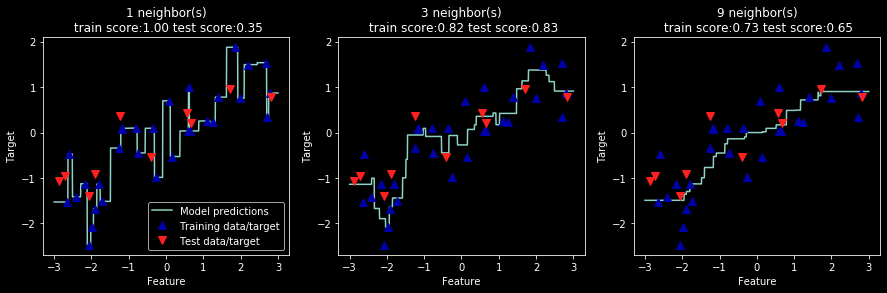

In [17]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title("{} neighbor(s)\n train score:{:.2f} test score:{:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions","Training data/target","Test data/target"],loc="best")

In [18]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)

In [19]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [20]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)

In [21]:
print("Trainig set score: {:,.2f}".format(lr.score(X_train,y_train)))

Trainig set score: 0.95


In [22]:
print(lr.score(X_test,y_test))

0.6074721959665863


In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.8857966585170941
0.7527683481744755


In [24]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))

0.7882787115369614
0.6359411489177311


In [25]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))

0.9282273685001987
0.7722067936479814


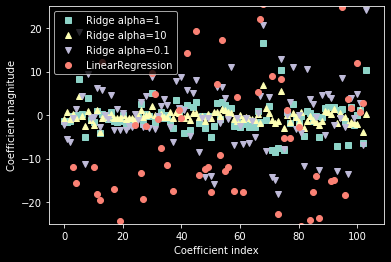

In [26]:
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")
plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

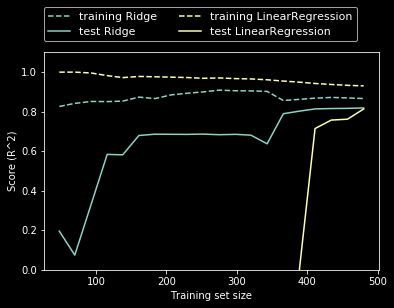

In [27]:
mglearn.plots.plot_ridge_n_samples()

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
print(np.sum(lasso.coef_ !=0))

0.29323768991114596
0.20937503255272272
4


In [29]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print(lasso001.score(X_train,y_train))
print(lasso001.score(X_test,y_test))
print(np.sum(lasso001.coef_ !=0))

0.8962226511086497
0.7656571174549983
33


In [30]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print(lasso00001.score(X_train,y_train))
print(lasso00001.score(X_test,y_test))
print(np.sum(lasso00001.coef_ !=0))

0.9507158754515462
0.6437467421273558
96


(-25, 25)

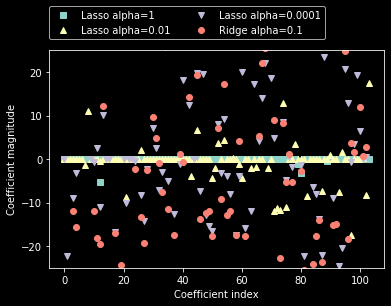

In [31]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")
plt.plot(lr.coef_,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-25,25)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X,y = mglearn.datasets.make_forge()
fig,axes =plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf._class_._name_))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AttributeError: 'LinearSVC' object has no attribute '_class_'

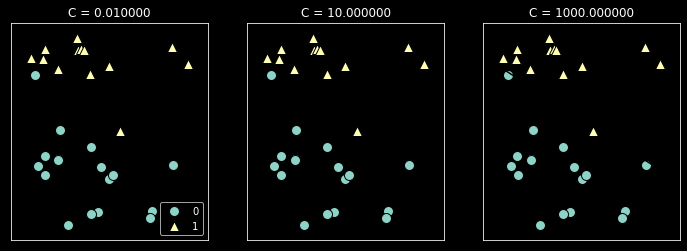

In [45]:
mglearn.plots.plot_linear_svc_regularization()

In [46]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.9577464788732394
0.965034965034965
/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print(logreg100.score(X_train,y_train))
print(logreg100.score(X_test,y_test))

0.9741784037558685
0.965034965034965
/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print(logreg001.score(X_train,y_train))
print(logreg001.score(X_test,y_test))

0.9248826291079812
0.958041958041958
/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


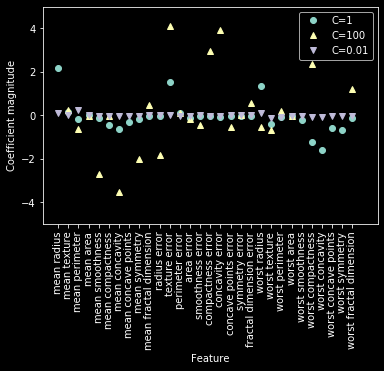

In [49]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
0.9107981220657277
0.951048951048951
0.960093896713615
0.958041958041958
/Users/ikuma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
0.9882629107981221
0.972027972027972


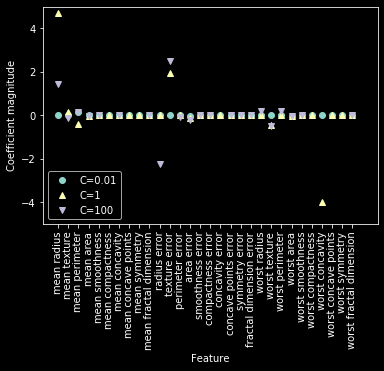

In [51]:
for C,maker in zip([0.01,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C,penalty="l1").fit(X_train,y_train)
    print(lr_l1.score(X_train,y_train))
    print(lr_l1.score(X_test,y_test))
    plt.plot(lr_l1.coef_.T,maker,label="C={:}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5,5)
plt.legend(loc=3)

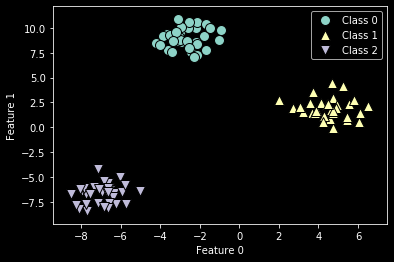

In [53]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

In [54]:
linear_svm=LinearSVC().fit(X,y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


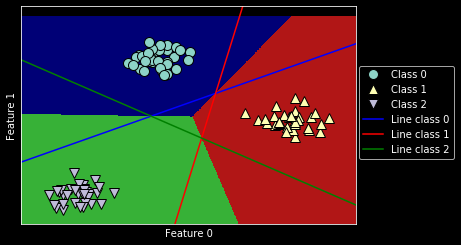

In [55]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha =.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))

In [56]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])
counts ={}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis = 0)
print(counts)

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [57]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test =train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

1.0
0.9370629370629371


In [59]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
tree.score(X_train,y_train)
tree.score(X_test,y_test)

0.951048951048951